### Importando as bibliotecas

In [19]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick
from google.colab import files

print(f'Versão do pandas: {pd.__version__}')
print(f'Versão do numpy: {np.__version__}')
print(f'Versão do scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versão do seaborn: {sns.__version__}')
print(f'Versão do yellowbrick: {yellowbrick.__version__}')


Versão do pandas: 2.2.2
Versão do numpy: 1.26.4
Versão do scikit-learn (sklearn): 1.5.2
Versão do seaborn: 0.13.2
Versão do yellowbrick: 1.5


# Explorando os dados

### Entendendo os conjuntos de dados

In [5]:
# Carregando o arquivo e imprimindo as 5 primeiras linhas
dados = pd.read_csv('flights.csv')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0.0,2010.0,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0.0,2010.0,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0.0,2010.0,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0.0,2010.0,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0.0,2010.0,False,15.016271


In [6]:
# Para verificar quantas amostras tem, basta printas as útlimas 5 linhas (71174)
dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
40981,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,177.0,2017.0,True,46.177659
40982,24,BZ,Airbus A320,schengen,FJB,9.668655,12.668655,177.0,2017.0,True,37.390188
40983,30,BZ,Embraer E175,schengen,PUA,8.923441,12.923441,177.0,2017.0,True,38.986000
40984,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,177.0,2017.0,True,29.910320
40985,28,BZ,Airbus A330,non-schengen,EMM,15.967962,NaN,NaN,NaN,NaN,NaN


In [7]:
# Visualizar a quantidade de colunas
dados.shape

(40986, 11)

In [8]:
# Obter informações descritivas (média, valor máximo e mínimo, etc)
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,40986.000000,40986.000000,40985.000000,40985.000000,40985.000000,40985.000000
mean,15.427512,13.302259,16.507074,175.910089,2013.259607,12.514867
std,8.657064,4.030611,4.152665,105.290833,2.170608,23.161894
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-39.953527
25%,8.000000,8.939996,12.668655,85.000000,2011.000000,-4.556291
50%,15.000000,14.376052,17.967963,170.000000,2013.000000,9.683334
75%,23.000000,16.909690,20.041281,267.000000,2015.000000,27.758686
max,30.000000,19.341235,23.341235,364.000000,2017.000000,123.340562


In [9]:
# Informações descritivas para variáveis categóricas
dados.describe(include='O')

,airline,aircraft_type,schengen,origin,is_holiday
count,40986,40986,40986,40986,40985
unique,3,6,2,10,2
top,BZ,Airbus A320,schengen,TZF,False
freq,27428,17669,24527,8161,38805


In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40986 entries, 0 to 40985
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       40986 non-null  int64  
 1   airline         40986 non-null  object 
 2   aircraft_type   40986 non-null  object 
 3   schengen        40986 non-null  object 
 4   origin          40986 non-null  object 
 5   arrival_time    40986 non-null  float64
 6   departure_time  40985 non-null  float64
 7   day             40985 non-null  float64
 8   year            40985 non-null  float64
 9   is_holiday      40985 non-null  object 
 10  delay           40985 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.4+ MB


### Visualizações gráficas dos dados

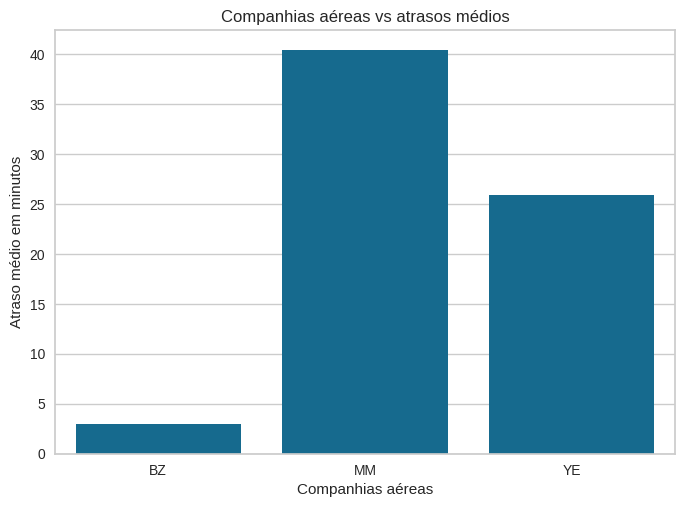

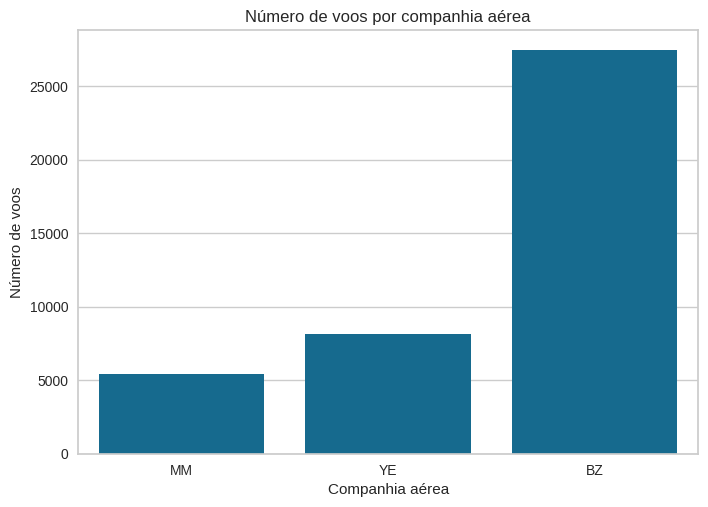

In [11]:
# Calcula a média de atrasos para cada companhia aérea e cria um novo DataFrame com esses valores utilizando o método (.reset_index())
average_delay = dados.groupby('airline')['delay'].mean().reset_index()

# Gráfico: Atrasos médios por companhia aérea | (sns.barplot()) é utilizado para criar gráficos de barras)
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

# Gráfico: Número de voos por companhia aérea | O método (sns.countplot()) é usado para criar gráficos de contagem
sns.countplot(data=dados, x='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

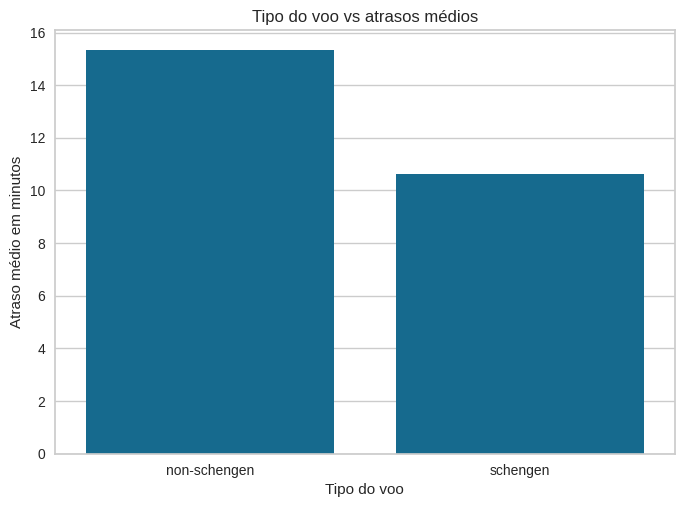

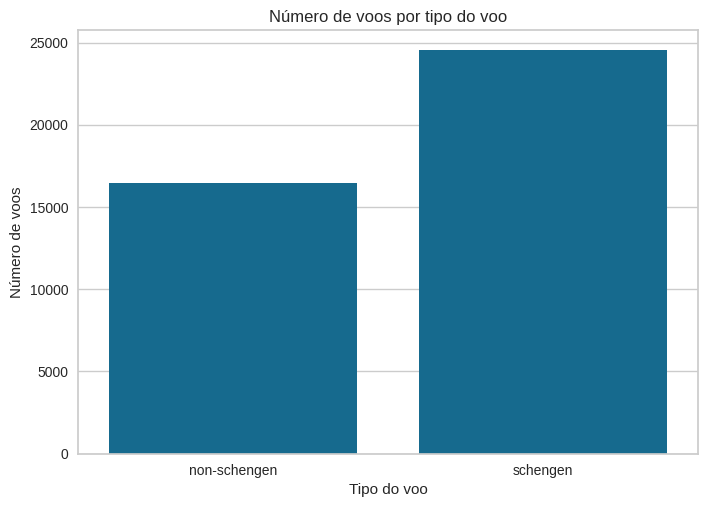

In [12]:
# Analisar se o tipo do voo tem algum impacto na média dos atrasos
# Calcula a média de atrasos para o tipo 'schengen' e cria um novo DataFrame com esses valores utilizando o método (.reset_index())
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()

# Gráfico: Atrasos médios por tipo de voo | (sns.barplot()) é utilizado para criar gráficos de barras)
sns.barplot(x='schengen', y='delay',data=average_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

# Gráfico: Número de voos por tipo de voo | O método (sns.countplot()) é usado para criar gráficos de contagem
sns.countplot(data=dados, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

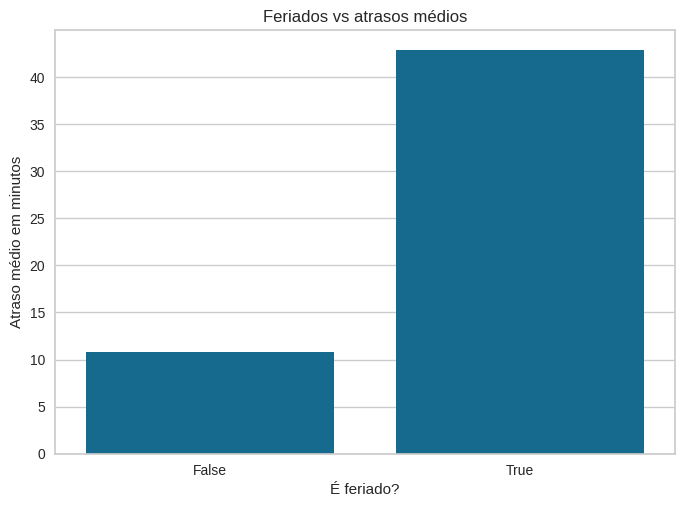

In [13]:
# Analisar se os atrasos em feriados são maiores ou menores do que em dias não feriados.

# Calcula a média de atrasos para dias de feriado e não feriado e cria um novo DataFrame com esses valores utilizando o método (.reset_index())
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()

# Gráfico: Atrasos médios por dia de feriado | (sns.barplot()) é utilizado para criar gráficos de barras)
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriados vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()


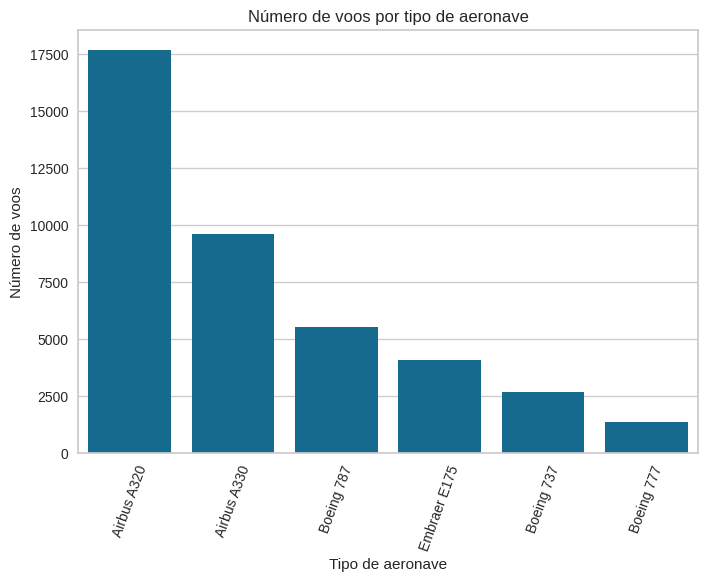

In [14]:
# Analisar qual o tipo de avião existe em maior quantidade no conjunto de dados

# Criar uma ordem
order = dados['aircraft_type'].value_counts().index

# Gráfico: Número de voos por tipo de avião| O método (sns.countplot()) é usado para criar gráficos de contagem
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de voos')
plt.show()

### Analisando a distribuição dos dados

#### Como encontrar a largura de bin ideal?

**Regra de Freedman-Diaconis**

Ela determina a largura do bin, que é igual a 2 vezes o intervalo interquartil dividido pela raiz cúbica do número de observações.

[Freedman-Diaconis rule - Wikipedia](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule)


In [27]:
def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

<Axes: xlabel='arrival_time', ylabel='Count'>

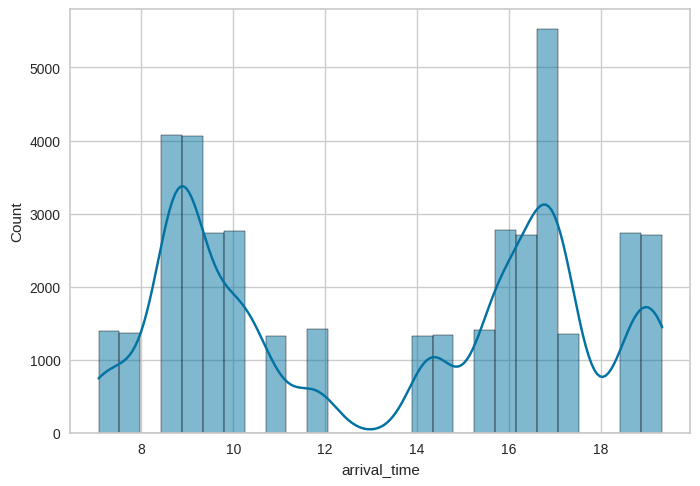

In [28]:
# Histograma: ferramenta de visualização de dados que mostra a distribuição de uma variável numérica

# Arrival time
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')
sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at)

<Axes: xlabel='departure_time', ylabel='Count'>

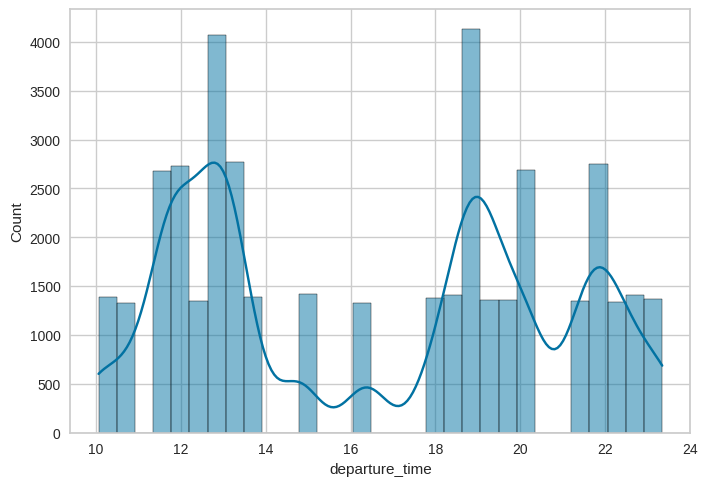

In [38]:
# Departure time

# Remove valores ausentes
dados = dados.dropna(subset=['departure_time'])

largura_bin_dt = calcular_largura_bin(dados, 'departure_time')
sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_dt)

#### O objetivo do boxplot
O **boxplot**, também conhecido como **diagrama de caixa**, é uma representação gráfica que nos permite visualizar a distribuição dos dados de uma forma mais clara e objetiva.

Ele é composto por:
- um retângulo que representa a mediana e os quartis dos dados
- linhas que se estendem para fora do retângulo, que mostram a amplitude dos dados

Onde:
- limite inferior é o valor mínimo que um dado pode ter sem ser considerado um valor atípico (outlier). Ele é calculado como Q1 - 1,5 x IQR (onde IQR é a amplitude interquartil, ou seja, a diferença entre o terceiro quartil e o primeiro quartil).
- O primeiro quartil (Q1) é o valor que divide os dados em 25% abaixo e 75% acima dele. Ou seja, 25% dos dados estão abaixo do Q1 e 75% estão acima.
- A mediana é o valor que divide os dados em 50% abaixo e 50% acima dele.
O terceiro quartil (Q3) é o valor que divide os dados em 75% abaixo e 25% acima dele. Ou seja, 75% dos dados estão abaixo do Q3 e 25% estão acima.
- O limite superior é o valor máximo que um dado pode ter sem ser considerado um valor atípico. Ele é calculado como Q3 + 1,5 x IQR.

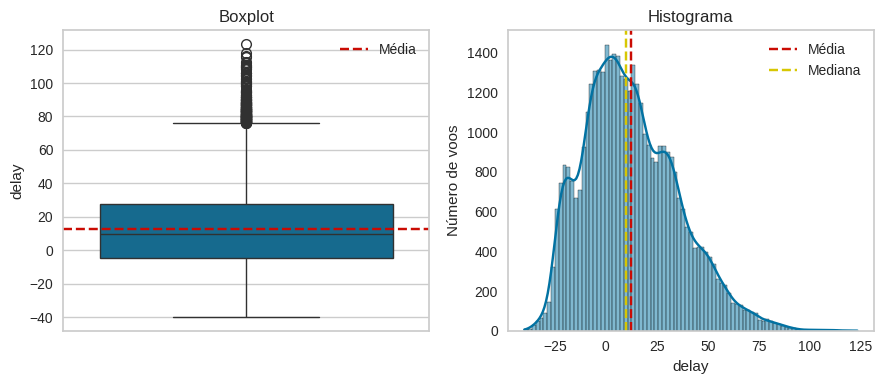

In [39]:
# Histogram de 'delay'
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()